In [100]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [101]:
print(f'action space is :{env.action_space}')
print(f'state space is: {env.observation_space}')

action space is :Discrete(6)
state space is: Discrete(500)


In [102]:
env.reset()
env.s = env.encode(3,1,1,1)
print(f'state: {env.s}')
env.render()

state: 325
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [103]:
env.reset()
env.s = env.encode(0,4,4,1)
print(f'state: {env.s}')
env.render()
print(f'state: {env.P[env.s]}')

state: 97
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

state: {0: [(1.0, 197, -1, False)], 1: [(1.0, 97, -1, False)], 2: [(1.0, 97, -1, False)], 3: [(1.0, 77, -1, False)], 4: [(1.0, 97, -10, False)], 5: [(1.0, 85, 20, True)]}


In [104]:
# initialize q table
q = np.zeros((env.observation_space.n, env.action_space.n))
q_pre = np.zeros((env.observation_space.n, env.action_space.n)) # to check convergence when training
print(f'current q table shape is: {q.shape}')

current q table shape is: (500, 6)


In [105]:
# hyper parameters
alpha = 0.5
gamma = 0.95
epsilon = 0.1

In [106]:
def epsilon_greedy_policy(env, state, q, epsilon):
    '''
    epsilon greedy policy for q learning to generate actions
    '''
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q[state])

In [107]:
def update_q_table(q, pre_state, action, reward, next_state, alpha, gamma):
    '''
    
    '''
    next_max = np.max(q[next_state]) # max state-action value for next state
    # print(f'current status is: {type(q[pre_state,action])},{type(alpha)},{type(reward)},{type(gamma)},{type(next_max)}')
    q[pre_state,action] = q[pre_state,action] + alpha * (reward + gamma * next_max - q[pre_state,action])

0th episode: -380, 204.1125
100th episode: -58, 28.76235754732324
200th episode: -33, 17.17742883872971
300th episode: -44, 19.575776445081992
400th episode: -9, 20.82151767388497
500th episode: -19, 13.677422873353452
600th episode: -18, 4.120429146789581
700th episode: -8, 7.861292894339364
800th episode: 9, 4.682758553997112
900th episode: 9, 9.9539153766383
1000th episode: -8, 4.076411943019178
1100th episode: 3, 1.4343891229187982
1200th episode: -5, 6.386549210659015
1300th episode: 1, 5.021947655797182
1400th episode: 7, 1.15625
1500th episode: 12, 0.0
1600th episode: 6, 1.6019829841834423
1700th episode: 8, 4.756263393579374e-06
1800th episode: -8, 8.185112720863478
1900th episode: 7, 0.03544961954374948
2000th episode: 6, 0.0009948501413846178
2100th episode: -27, 0.5164146752423546
2200th episode: 6, 0.04584046922513807
2300th episode: 10, 0.008896764670115243
2400th episode: 9, 0.00914584215112857
2500th episode: -6, 2.7698063536793955
2600th episode: 7, 0.8974363563523351
2

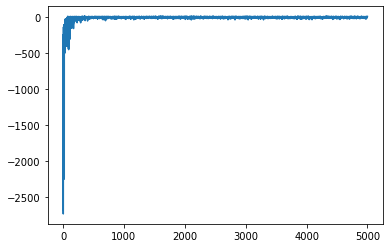

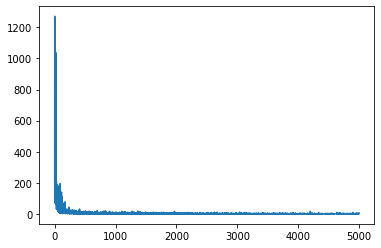

In [108]:
#q learning
reward_record = []
error_record = []
# loop for each episode:
for episode in range(5000):
    r = 0
    state = env.reset()
    while True:# loop for each step of episode
        # choose A from S using policy derived from Q(e.g, epsilon greedy policy)
        action = epsilon_greedy_policy(env,state,q,epsilon)
        # take action A, observe R, S'
        next_state, reward, done, _ = env.step(action)
        # update Q(S,A)
        update_q_table(q,state,action,reward,next_state,alpha,gamma)
        # S<--S'
        state = next_state
        r += reward
        if done:
            break
    
    reward_record.append(r)
    error = 0
    for i in range(q.shape[0]):
        error = error + np.sum(np.abs(q[i]-q_pre[i]))
        # print(f'{np.abs(q[i]-q_pre[i])},{np.sum(np.abs(q[i]-q_pre[i]))}')
    error_record.append(error)
    q_pre = np.copy(q)

    if episode%100 == 0:
        print(f'{episode}th episode: {r}, {error}')

#close game env
env.close()

#plot diagram
plt.plot(list(range(5000)),reward_record)
plt.show()

plt.plot(list(range(5000)),error_record)
plt.show()

In [109]:
def epsilon_greedy_policy_sarsa(env, state, sarsa, epsilon):
    '''
    epsilon greedy policy for q learning to generate actions
    '''
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(sarsa[state])

In [110]:
def update_sarsa_table(sarsa, state, action, reward, next_state, next_action, alpha, gamma):
    '''
    update sarsa state-action pair value, main difference from q learning is that it uses epsilon greedy policy
    return action
    '''
    next_max = sarsa[next_state,next_action] # corresponding action-state value to current action

    # print(f'current status is: {type(q[pre_state,action])},{type(alpha)},{type(reward)},{type(gamma)},{type(next_max)}')
    sarsa[state,action] = sarsa[state,action] + alpha * (reward + gamma * next_max - sarsa[state,action])

0th episode: -596, 253.60540235934457
100th episode: -290, 105.81159831776588
200th episode: -335, 130.1553511289839
300th episode: -335, 101.59733443990976
400th episode: -126, 51.18520423035096
500th episode: -263, 50.19813478848578
600th episode: -380, 95.71756598879409
700th episode: -353, 69.5850013749342
800th episode: -18, 17.212000456390896
900th episode: -236, 22.336926083359117
1000th episode: 2, 6.238589528557121
1100th episode: -254, 40.45590886994664
1200th episode: -16, 27.41289466361926
1300th episode: -3, 9.561999749828487
1400th episode: -272, 45.54611017369734
1500th episode: -1, 6.705358387099539
1600th episode: -299, 52.90855653726244
1700th episode: -254, 42.24977853828405
1800th episode: -299, 68.51281703656416
1900th episode: -281, 47.53260394088651
2000th episode: -81, 38.01204928606392
2100th episode: -133, 45.96095816439928
2200th episode: -91, 64.15437862394226
2300th episode: -9, 15.86978405865609
2400th episode: -4, 10.923999062335403
2500th episode: -10, 2

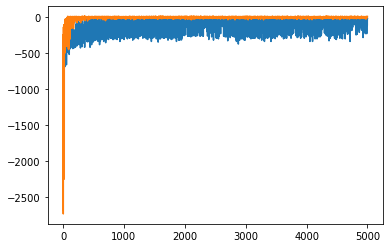

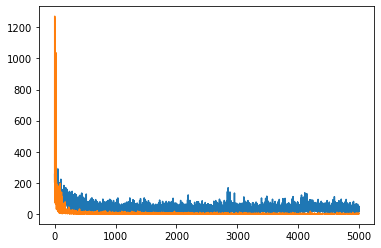

In [111]:
env = gym.make("Taxi-v3")
# sarsa learning
# initialize sarsa table
sarsa = np.zeros((env.observation_space.n, env.action_space.n))
sarsa_pre = np.zeros((env.observation_space.n, env.action_space.n)) # to check convergence when training

sarsa_reward_record = []
sarsa_error_record = []
# loop for each episode:
for episode in range(5000):
    r = 0
    state = env.reset()
    # choose A from S using policy derived from Q(e.g, epsilon greedy policy)
    action = epsilon_greedy_policy_sarsa(env, state, sarsa, epsilon)
    while True:# loop for each step of episode
        # take action A, observe R, S'
        next_state, reward, done, _ = env.step(action)
        # choose action A' from S' using policy derived from Q(e.g, epsilon greedy policy)
        next_action = epsilon_greedy_policy_sarsa(env, state, sarsa, epsilon)
        # update Q(S,A)
        update_sarsa_table(sarsa, state, action, reward, next_state, next_action, alpha, gamma)
        # S<--S'
        state = next_state
        action = next_action
        r += reward
        if done:
            break
    
    sarsa_reward_record.append(r)
    error = 0
    for i in range(sarsa.shape[0]):
        error = error + np.sum(np.abs(sarsa[i]-sarsa_pre[i]))
        # print(f'{np.abs(q[i]-q_pre[i])},{np.sum(np.abs(q[i]-q_pre[i]))}')
    sarsa_error_record.append(error)
    sarsa_pre = np.copy(sarsa)

    if episode%100 == 0:
        print(f'{episode}th episode: {r}, {error}')
#close game env
env.close()

#plot diagram
plt.plot(list(range(5000)),sarsa_reward_record)
plt.plot(list(range(5000)),reward_record)
plt.show()

plt.plot(list(range(5000)),sarsa_error_record)
plt.plot(list(range(5000)),error_record)
plt.show()

current reward is: -722, 69.075896
current reward is: -245, 17.297628690882945
current reward is: 7, 1.682352855659159
current reward is: -186, 10.39992729238926
current reward is: -249, 11.62472852032828
current reward is: -85, 4.423772021360843
current reward is: -105, 3.47374131374801
current reward is: -236, 3.498127102417844
current reward is: -27, 1.7804944872773736
current reward is: 15, 0.2679936434891653
current reward is: 13, 0.30529641311464856
current reward is: -272, 5.180881668668775
current reward is: -9, 0.30151078190551006
current reward is: -272, 6.444397462837871
current reward is: -245, 3.959919868495458
current reward is: 15, 0.2951084762823511
current reward is: 13, 0.16791076638540686
current reward is: 8, 0.21555645930193634
current reward is: -132, 3.0198503640630294
current reward is: -2, 1.5086556852915733
current reward is: -23, 2.387283917363633
current reward is: -281, 4.937804849914441
current reward is: -245, 2.6556513415302567
current reward is: -4, 0.3

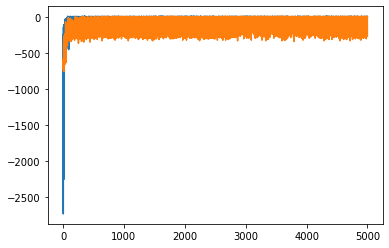

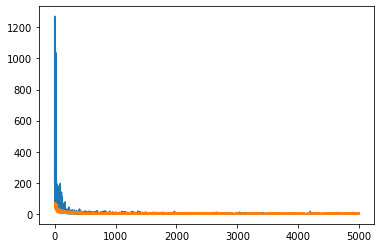

In [112]:
import numpy as np
import gym

# FrozenLake-v0 gym environment
# env = gym.make('FrozenLake-v0')
env = gym.make("Taxi-v3")

# Parameters
epsilon = 0.1
total_episodes = 5000
# max_steps = 100
alpha = 0.1
gamma = 0.6
  
#Initializing the Q-vaue
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q_pre = np.copy(Q)

test_reward = []
test_error = []

# Function to choose the next action with episolon greedy
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action
    
#Initializing the reward
reward=0
  
# Starting the SARSA learning
for episode in range(total_episodes):
    # t = 0
    state1 = env.reset()
    # action1 = choose_action(state1)
    action1 = epsilon_greedy_policy_sarsa(env, state1, Q, epsilon)
    r = 0
    # while t < max_steps:
    while True:
        # Visualizing the training
#         env.render()
          
        # Getting the next state
        state2, reward, done, info = env.step(action1)
  
        #Choosing the next action
        # action2 = choose_action(state2)
        action2 = epsilon_greedy_policy_sarsa(env, state2, Q, epsilon)
          
        #Learning the Q-value
        # Q[state1, action1] = Q[state1, action1] + alpha * (reward + gamma * Q[state2, action2] - Q[state1, action1])
        update_sarsa_table(Q, state1, action1, reward, state2, action2, alpha, gamma)
  
        state1 = state2
        action1 = action2
          
        #Updating the respective vaLues
        # t += 1
        r += reward
          
        #If at the end of learning process
        if done:
            break
    
    test_reward.append(r)
    error = 0
    for i in range(Q.shape[0]):
        error = error + np.sum(np.abs(Q[i]-Q_pre[i]))
        # print(f'{np.abs(q[i]-q_pre[i])},{np.sum(np.abs(q[i]-q_pre[i]))}')
    test_error.append(error)
    Q_pre = np.copy(Q)

    if episode%100 == 0:
        print(f'current reward is: {r}, {error}')
            
#close game env
env.close()

#plot diagram
plt.plot(list(range(5000)),reward_record)
plt.plot(list(range(5000)),test_reward)
plt.show()

plt.plot(list(range(5000)),error_record)
plt.plot(list(range(5000)),test_error)
plt.show()

0th episode: -560, 27.774000000000008
100th episode: -281, 9.69815363321839
200th episode: -254, 6.374670971048766
300th episode: -272, 6.831801952501329
400th episode: -299, 7.626139618530769
500th episode: -105, 1.6585004089985387
600th episode: -228, 5.679068040769751
700th episode: -78, 1.4521381309763313
800th episode: -272, 4.24031521350215
900th episode: -229, 3.826944197592831
1000th episode: -102, 1.7979046037580888
1100th episode: -18, 0.7312604443149989
1200th episode: -4, 0.527352238742865
1300th episode: -50, 0.6820499673700295
1400th episode: -19, 1.4568854496684582
1500th episode: -44, 0.3205398310459543
1600th episode: -77, 0.9683187895470947
1700th episode: -132, 1.4464609542745115
1800th episode: -13, 0.11160978975399971
1900th episode: -7, 0.48348919183717176
2000th episode: -45, 1.1353932026776778
2100th episode: -8, 0.5894103169988367
2200th episode: -5, 0.5267046164937291
2300th episode: -27, 0.7861972175226208
2400th episode: 8, 0.01830113530108876
2500th episode

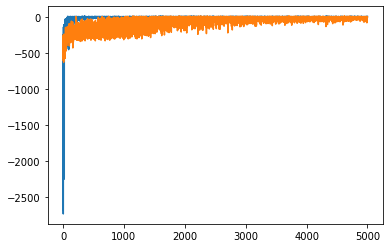

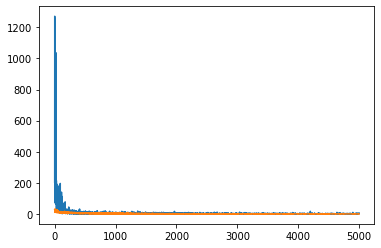

In [113]:
#double q learning
env = gym.make("Taxi-v3")

# initialize q table
q1 = np.zeros((env.observation_space.n, env.action_space.n))
q2 = np.zeros((env.observation_space.n, env.action_space.n))
q1_pre = np.zeros((env.observation_space.n, env.action_space.n)) # to check convergence when training
q2_pre = np.zeros((env.observation_space.n, env.action_space.n)) # to check convergence when training

# reward and error record
d_reward_record = []
d_error_record = []

# loop for each episode:
for episode in range(5000):
    r = 0
    state = env.reset()
    while True:# loop for each step of episode
        # choose A from S using policy derived from Q1+Q2(e.g, epsilon greedy policy)
        action = epsilon_greedy_policy(env,state,q1+q2,epsilon)
        # take action A, observe R, S'
        next_state, reward, done, _ = env.step(action)
        # with 0.5 probability:
        if random.uniform(0,1) < 0.5:
            update_q_table(q1,state,action,reward,next_state,alpha,gamma)
        else:
            update_q_table(q2,state,action,reward,next_state,alpha,gamma)
        # S<--S'
        state = next_state
        r += reward
        if done:
            break
    
    d_reward_record.append(r)
    error = 0
    for i in range(q.shape[0]):
        error = error + 0.5 * np.sum(np.abs(q1[i]-q1_pre[i])) + 0.5 * np.sum(np.abs(q2[i]-q2_pre[i]))
        # print(f'{np.abs(q[i]-q_pre[i])},{np.sum(np.abs(q[i]-q_pre[i]))}')
    d_error_record.append(error)
    q1_pre = np.copy(q1)
    q2_pre = np.copy(q2)

    if episode%100 == 0:
        print(f'{episode}th episode: {r}, {error}')

#close game env
env.close()

#plot diagram
plt.plot(list(range(5000)),reward_record)
plt.plot(list(range(5000)),d_reward_record)
plt.show()

plt.plot(list(range(5000)),error_record)
plt.plot(list(range(5000)),d_error_record)
plt.show()

In [ ]:
#monte carlo method
env = gym.make("Taxi-v3")

def get_probs(q, env, epsilon):
    '''
    get the probability of taking the best known action according to epsion
    '''
    actions = np.argmax(q,dims=1)
    policy_s = np.ones((env.observation_space.n, env.action_space.n))*epsilon/env.action_space.n
    policy_s[:,actions] = 1 - epsilon + (epsilon / env.action_space.n)
    return policy_s

def update_Q(env, episodes, Q, q):
    for (s,a,r) in episodes:
        sum = 0
        for x in Q[(s,a)]:
            sum += x
        avg = sum/len(Q[(s,a)])
        q[s,a] = avg

def run(env, Q, q, epsilon, gamma,r):
    episodes = []
    state = env.reset()
    G = 0
    while True:# loop for each step of episode
        probs = get_probs(q, env, epsilon) # get the current behavior policy
        action = np.random.choice(np.arange(env.action_space.n),p=probs)\
            if state in Q else env.action_space.sample()
        
        next_state, reward, done, _ = env.step(action)
        episodes.append((state, action, reward))

        G = gamma * G + reward
        Q[(state, action)].append(G)

        r += reward

        state = next_state
        if done:
            break
    return episodes

# initialize q table
q = np.zeros((env.observation_space.n, env.action_space.n))
Q = {}

# reward and error record
q_reward_record = []
q_error_record = []

# loop for each episode:
for episode in range(5000):
    r = 0
    state = env.reset()
    episodes = run(env,Q,epsilon,gamma,r)
    update_Q(env,episodes,Q,q)
    
    if episode%100 == 0:
        print(f'{episode}th episode: {r}')

#     d_reward_record.append(r)
#     error = 0
#     for i in range(q.shape[0]):
#         error = error + 0.5 * np.sum(np.abs(q1[i]-q1_pre[i])) + 0.5 * np.sum(np.abs(q2[i]-q2_pre[i]))
#         # print(f'{np.abs(q[i]-q_pre[i])},{np.sum(np.abs(q[i]-q_pre[i]))}')
#     d_error_record.append(error)
#     q1_pre = np.copy(q1)
#     q2_pre = np.copy(q2)

#     if episode%100 == 0:
#         print(f'{episode}th episode: {r}, {error}')

# #close game env
# env.close()

# #plot diagram
# plt.plot(list(range(5000)),reward_record)
# plt.plot(list(range(5000)),d_reward_record)
# plt.show()

# plt.plot(list(range(5000)),error_record)
# plt.plot(list(range(5000)),d_error_record)
# plt.show()